<b>Demo for integrating acoustic area coefficient - NASC over a selected region along Angolan coast.</b> <p><p>
<b>Note:</b> data for this analysis are synthetic - these do not represent of any real collected data. <p>
To access real data for this analysis apply at the <a href="https://www.fao.org/in-action/eaf-nansen/en"> EAF Nansen Portal</a>

<b>STEP1:</b> Tell Python the location of custom code and data

In [31]:
# discover location of top direcory for this package to cess the data.
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
  

<b>STEP2</b>: Import packages used in this analysis

In [16]:
import tatukgis_pdk as pdk
import nangis.dk as dk
import nangis.demo.data as data
from IPython import display
import matplotlib.pyplot as plt

Load map layers

In [4]:
lmap = dk.load_shp(data.test_map(), 'LAYER_MAP')  # loads Angola's coastline
lmap.SetCSByEPSG(4326)  # sets WGS84 
ldata = dk.load_shp(data.test_data(), 'LAYER_DATA') # laods synthetic NASC data
ldata.SetCSByEPSG(4326)
dk.set_style_nansen_report(ldata, 'FISH_SA')    # field FISH_SA selected for display
lstratum = dk.load_shp(data.test_stratum(), 'STRATUM1')   # loads predefined stratum over data
lstratum.SetCSByEPSG(4326)
lstratum.Name = 'LAYER_MASTER_STRATUM'      
dk.set_stratum_yellow_semitransparent(lstratum)    # set its style for semitrasparent yellowish color

<b>STEP3:</b> Prepare map - register the loaded layers and display them on the map 

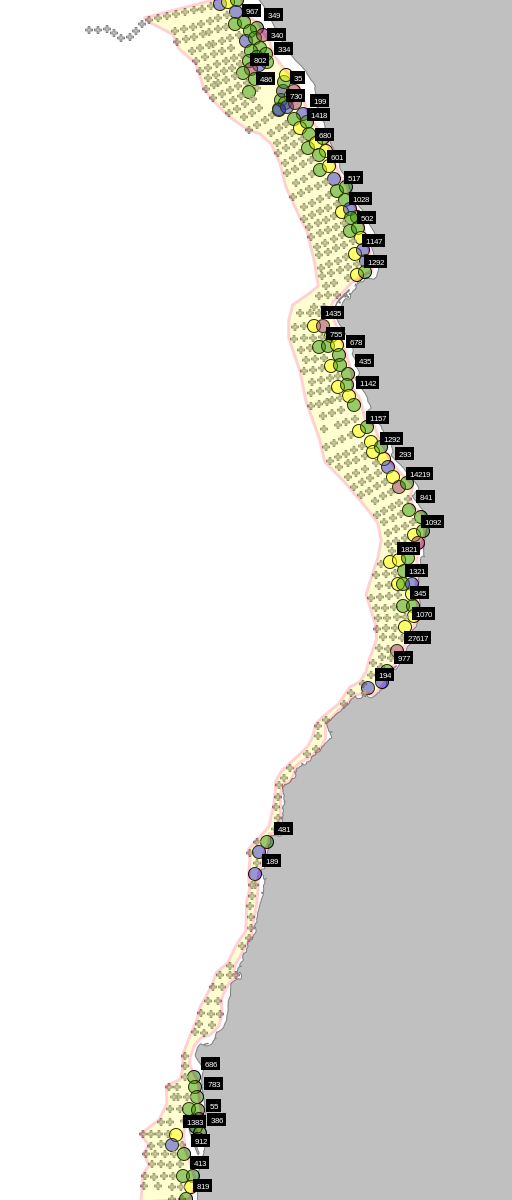

In [6]:
gis = pdk.TGIS_ViewerBmp(512, 1200)
gis.Add(lmap)
gis.Add(ldata)
gis.Add(lstratum)
gis.VisibleExtent = ldata.Extent
gis.InvalidateWholeMap()
display.Image(gis.GIS_Bitmap.AsPng())

<b>STEP4:</b> Data and strata layers are required to generate Voronoi diagrams around data points. The next step generates and displays Voronoi diagrams. Run the command line version of this test - file <i>integrator_demo_app.py</i> to see the legend representing the colors shown in this figure.

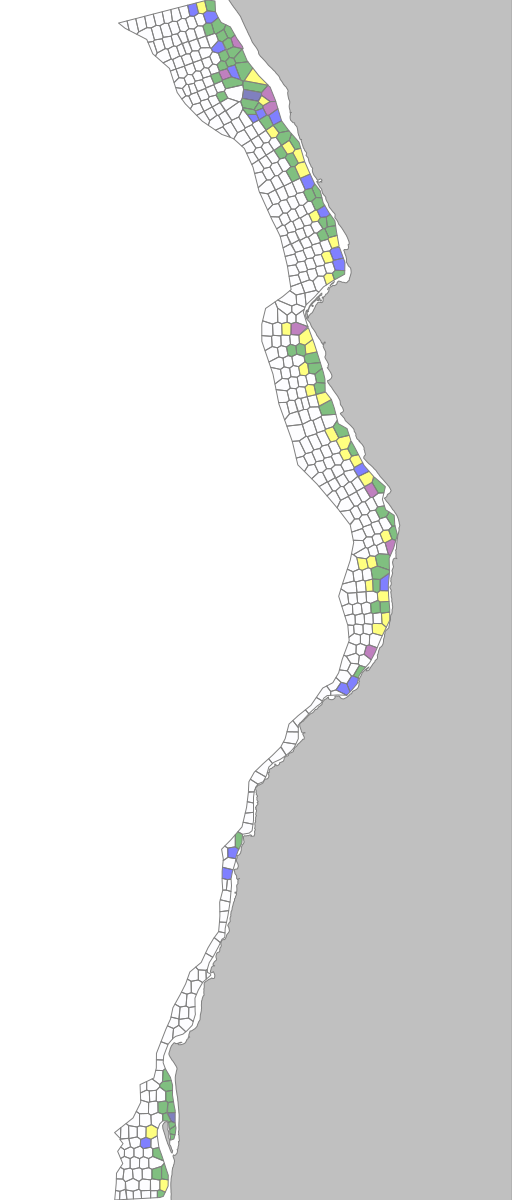

In [10]:
shp = dk.get_shape(lstratum, 0) # Stratum layer has one shape only. This operation retrieves this shape
lvor = dk.build_voronoi_map(ldata,shp)   # builds Voronoi diagram layer
dk.set_style_nansen_voronoi_map(lvor, 'FISH_SA')     # display synthetic fish distribution
# display map and Voronoi diagrams
gis = pdk.TGIS_ViewerBmp(512, 1200)
gis.Add(lmap)
gis.Add(lvor)
gis.VisibleExtent = vor.Extent
gis.InvalidateWholeMap()
display.Image(gis.GIS_Bitmap.AsPng())

<b>STEP5:</b> integrate the abundance (NASC units x area in square nautical miles) for the three regions along the Angolan coast: Northern, Central and Southern. 

In [35]:
# integrate in regions
north = dk.integrate_lat_strip(lvor, ['FISH_SA'], -9.0, -6.0)
central = dk.integrate_lat_strip(lvor, ['FISH_SA'], -12.5, -9.0)
south = dk.integrate_lat_strip(lvor, ['FISH_SA'], -17.25, -12.5)

# the integrator function computes several fields - the followng code retrives names of these fields
it_names = dk.get_integrator_field_names(['FISH_SA'])
for name in it_names:
    print(name)

AREA_COVERED
N_POLYGONS
FISH_SA
FISH_SA_AREA


<b>STEP6:</b>  Plot the distribution of NASC abundance in the three regions

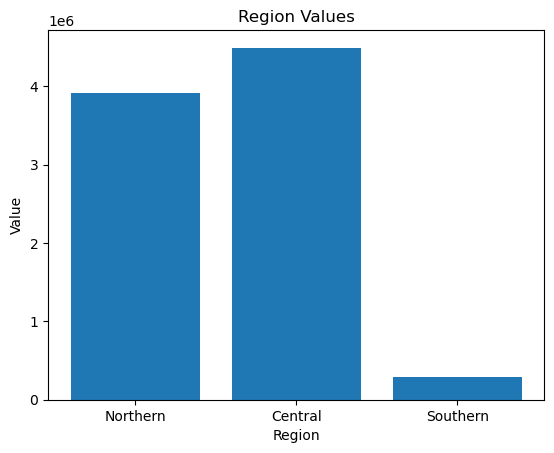

In [37]:

# Display the second element for each array - FISH_SA
x = ['Northern', 'Central', 'Southern']
y = [north[2], central[2], south[2]]

plt.bar(x, y)

plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Region Values')
plt.show()